## VOLITILITY OF TECHNOLOGY STOCKS
 
In this analysis we want to see how volitile is the technology Sector. In this analysis we will try to find the answer to the follwing questions:
- How volitile are tech stocks(TCS, INFOSYS, HCLTECH, WIPRO, TECHM) compared to NIFTY50 ?


### How volitile are tech stocks(TCS, INFOSYS, HCLTECH, WIPRO, TECHM) compared to NIFTY50 ?

In [1]:
import pandas as pd
import yfinance as yf # need to import yahoo finance in order download stock data directly from yahoo finance
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:

# created a fn to fetch data using yfinance 
def fetch_data(ticker, start_date, end_date):
    return yf.download(ticker, start=start_date, end=end_date)['Close']

# Set date range(Max available data on yfinance)
start_date = '2008-01-01'
end_date = '2025-01-23'

# list of tech companies and their tickers
tech_companies = {
'TCS' : 'TCS.NS',
'Infosys' : 'INFY.NS',
'HCLTech' : 'HCLTECH.NS' ,
'Wipro' : 'WIPRO.NS',
'Tech Mahindra' : 'TECHM.NS'
}

# Download data
tiwht = pd.DataFrame()
for company, ticker in tech_companies.items():
    tiwht[company] = fetch_data(ticker, start_date, end_date)
tiwht['NIFTY50'] = fetch_data('^NSEI', start_date, end_date)    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
tiwht

,TCS,Infosys,HCLTech,Wipro,Tech Mahindra,NIFTY50
Date,,,,,,
2008-01-01,199.140106,152.921768,53.614109,46.155422,211.306427,6144.350098
2008-01-02,198.280899,153.048737,52.332230,45.739483,208.377090,6179.399902
2008-01-03,190.925583,149.612701,51.608028,44.384350,209.971558,6178.549805
2008-01-04,189.820953,148.374008,52.448761,44.424595,207.644821,6274.299805
2008-01-07,184.231277,143.292252,49.826759,43.154423,201.239319,6279.100098
...,...,...,...,...,...,...
2025-01-16,4140.299805,1928.449951,1786.250000,288.049988,1687.650024,23311.800781
2025-01-17,4124.299805,1815.449951,1788.900024,281.950012,1660.300049,23203.199219
2025-01-20,4077.800049,1813.300049,1796.199951,300.250000,1674.599976,23344.750000


Rolling volatility is a moving measure of stock price fluctuations over a specified period. It helps analysts track how much a stock or index fluctuates 
over time rather than looking at overall volatility.



In [4]:
# Calculating daily returns
returns = tiwht.pct_change().dropna()

# Defining rolling window size (1 year = 252 trading days)
rolling_window = 252

# Calculating rolling volatility (annualized) for each company and nifty 50
rolling_volatility = returns.rolling(window=rolling_window).std() * np.sqrt(252)


C:\Users\nakum\AppData\Local\Temp\ipykernel_20084\3800788763.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = tiwht.pct_change().dropna()


In [5]:
returns

,TCS,Infosys,HCLTech,Wipro,Tech Mahindra,NIFTY50
Date,,,,,,
2008-01-02,-0.004315,0.000830,-0.023909,-0.009012,-0.013863,0.005704
2008-01-03,-0.037095,-0.022451,-0.013839,-0.029627,0.007652,-0.000138
2008-01-04,-0.005786,-0.008279,0.016291,0.000907,-0.011081,0.015497
2008-01-07,-0.029447,-0.034250,-0.049992,-0.028592,-0.030848,0.000765
2008-01-08,0.012556,0.015518,0.005179,0.014406,0.017044,0.001394
...,...,...,...,...,...,...
2025-01-16,-0.010189,-0.010874,-0.018322,-0.015718,0.006981,0.004248
2025-01-17,-0.003864,-0.058596,0.001484,-0.021177,-0.016206,-0.004659
2025-01-20,-0.011275,-0.001184,0.004081,0.064905,0.008613,0.006100


In [6]:
rolling_volatility

,TCS,Infosys,HCLTech,Wipro,Tech Mahindra,NIFTY50
Date,,,,,,
2008-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-08,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2025-01-16,0.217168,0.228849,0.241790,0.279547,0.259596,0.141931
2025-01-17,0.217201,0.236485,0.241672,0.280436,0.260168,0.142015
2025-01-20,0.217454,0.236389,0.240803,0.287570,0.260252,0.142098


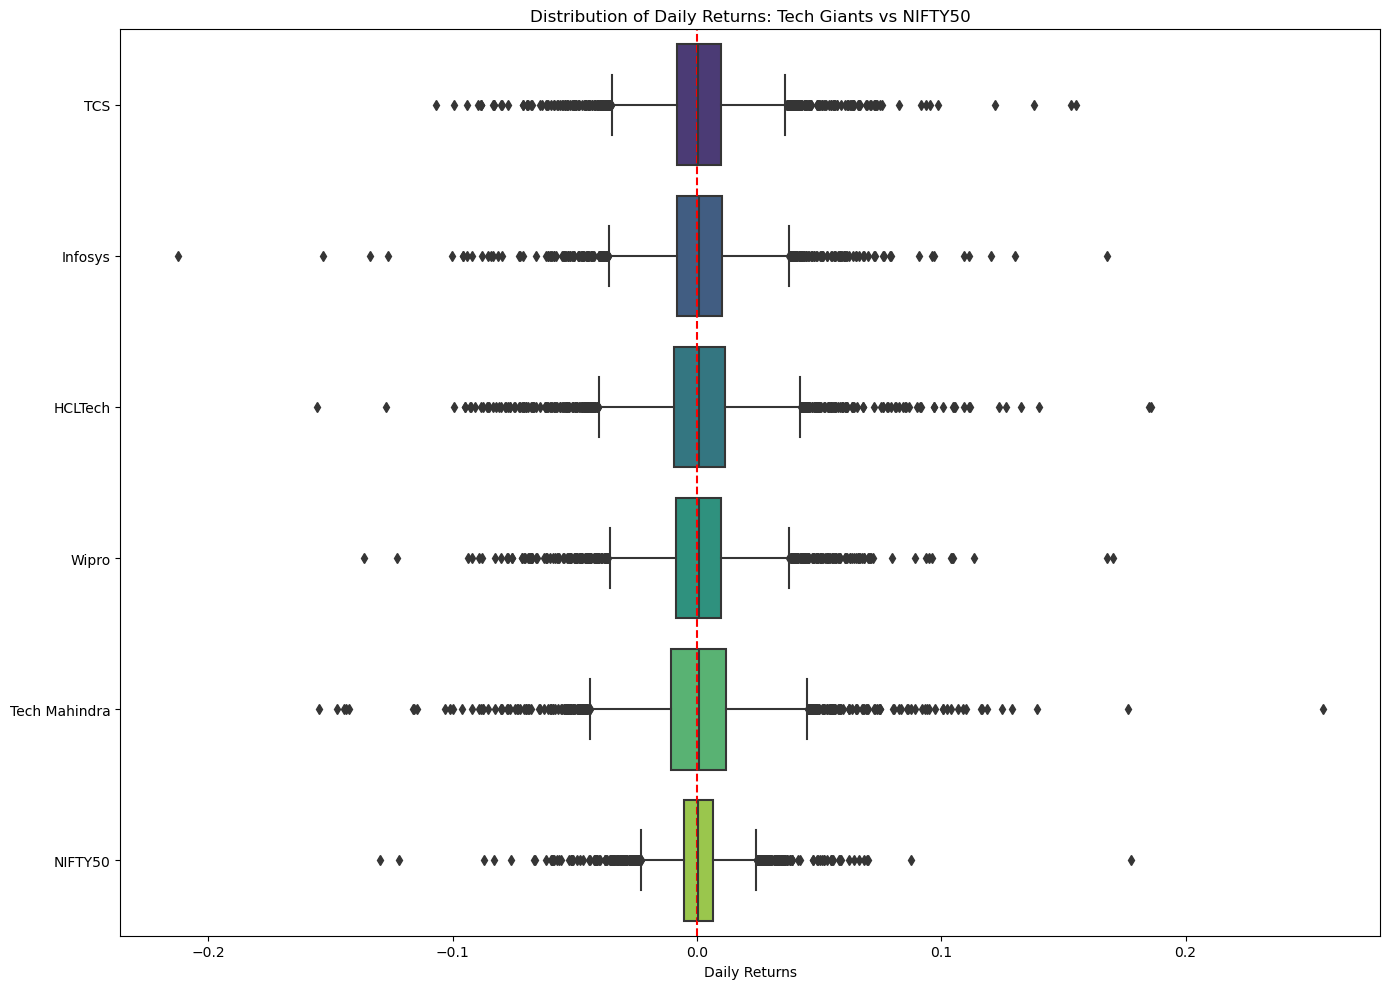

In [7]:

# Creating box plot
plt.figure(figsize=(14, 10))
sns.boxplot(data=returns, orient='h', palette='viridis')
plt.title('Distribution of Daily Returns: Tech Giants vs NIFTY50')
plt.xlabel('Daily Returns')
plt.axvline(x=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()



TCS & Tech Mahindra shows the widest spread, suggesting it has the highest volatility among the listed stocks. other tech companies are also more volitily as compared to NIFTY50 which is more smaller box and more closely spread.

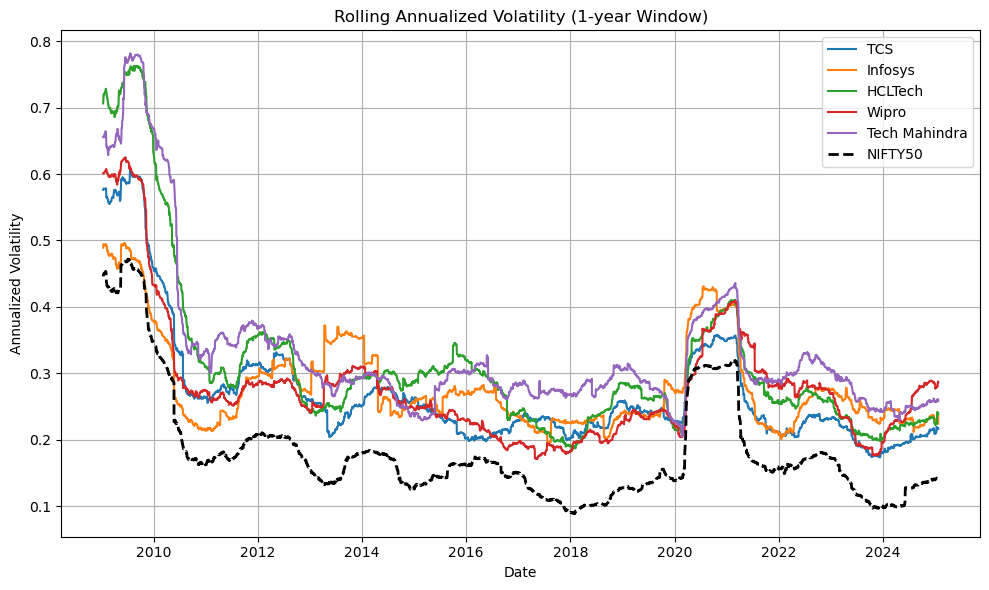

In [8]:
# Ploting rolling volatility for each company compared to NIFTY50
plt.figure(figsize=(10, 6))
for company in tech_companies:  
    plt.plot(rolling_volatility[company], label=company)
plt.plot(rolling_volatility['NIFTY50'], label='NIFTY50', color='black', linestyle='--', linewidth=2)
plt.title('Rolling Annualized Volatility (1-year Window)')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


From the graph we can clearly see that Tech Mahindra is the most volititle stock in recent times, NIFTY50 beign the least volitile among the various tech companies suggesting the tech sector is usually volitile in comparison.